# DiffuPy Usage and Customization

In [1]:
import os
import numpy as np
import pandas as pd

from diffupath.constants import ROOT_RESULTS_DIR, DEFAULT_DIFFUPATH_DIR

In [2]:
GRAPH_PATH = os.path.join(ROOT_RESULTS_DIR, 'data', 'graphs', '_graph.gml')
DATA_INPUT_PATH = os.path.join(ROOT_RESULTS_DIR, 'data', 'input_samples', 'input_sample_3.csv')

#### Input Dataset overview

In [3]:
from diffupy.process_input import process_input_data

In [4]:
input_labels = process_input_data(DATA_INPUT_PATH)
pd.DataFrame(index = input_labels.keys(), data={'scores':list(input_labels.values())})

,scores
V1,1.81
V2,1.86
V3,4.82
V4,1.64
V9,1.53


#### Graph overview

In [5]:
from diffupy.process_network import process_graph_from_file

import networkx as nx
import matplotlib.pyplot as plt

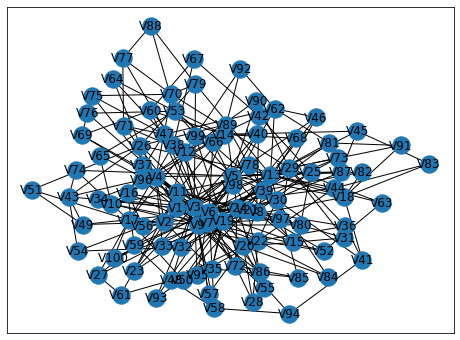

In [6]:
g = nx.read_gml(GRAPH_PATH, label='name')
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(g, ax=ax)

### Run basic diffusion

In [7]:
from diffupy.diffuse import run_diffusion

In [8]:
diff_result = run_diffusion(DATA_INPUT_PATH, GRAPH_PATH).as_pd_dataframe() #DATA INPUT and GRAPH as PATHs
diff_result.head(n=5)

Mapping coverage statistics

total:
5 mapped entities, 100.0% input coverage




/Users/Projects/MultiPath/diffuPy/src/diffupy/matrix.py:512: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  df.set_axis(rows_labels)


,output diffusion scores
V1,5.101629
V2,4.651528
V4,4.550666
V3,4.473349
V9,3.449531


In [9]:
diff_result = run_diffusion(input_labels, g).as_pd_dataframe() #DATA INPUT and GRAPH as Python OBJECTS
diff_result.head(n=5)

Mapping coverage statistics

total:
5 mapped entities, 100.0% input coverage




,output diffusion scores
V1,5.101629
V2,4.651528
V4,4.550666
V3,4.473349
V9,3.449531


### Customize diffusion method

#### Available methods

In [10]:
diff_result = run_diffusion(DATA_INPUT_PATH, GRAPH_PATH, method = 'z').as_pd_dataframe()
diff_result.head(n=5)

Mapping coverage statistics

total:
5 mapped entities, 100.0% input coverage




,output diffusion scores
V1,5.101629
V2,4.651528
V4,4.550666
V3,4.473349
V9,3.449531


In [11]:
diff_result = run_diffusion(DATA_INPUT_PATH, GRAPH_PATH, method = 'raw').as_pd_dataframe()
diff_result.head(n=5)

Mapping coverage statistics

total:
5 mapped entities, 100.0% input coverage




,output diffusion scores
V1,-0.623638
V2,-0.693434
V4,-0.752424
V3,-0.776944
V9,-0.777572


#### Custom method: PageRank

In [12]:
import networkx as nx
from diffupy.diffuse import run_diffusion

run_diffusion(DATA_INPUT_PATH, GRAPH_PATH, method = nx.pagerank)

{0: 0.01215561487407176,
 1: 0.01846784512517859,
 2: 0.03468910151755468,
 3: 0.025367286032752807,
 4: 0.029195140002494138,
 5: 0.031047124960312596,
 6: 0.03324268077083303,
 7: 0.017242231150300262,
 8: 0.026677440168268063,
 9: 0.011326871216906785,
 10: 0.019203874844964525,
 11: 0.015998264328250952,
 12: 0.027755631572553573,
 13: 0.016292314709265367,
 14: 0.005458163147682142,
 15: 0.010181535405135287,
 16: 0.014656696589778924,
 17: 0.012095650510682187,
 18: 0.01923750041987516,
 19: 0.016274039943300622,
 20: 0.014774554074368437,
 21: 0.016209770866960467,
 22: 0.005374537917686662,
 23: 0.016420093202120848,
 24: 0.011866057983655654,
 25: 0.014915622291522703,
 26: 0.007193681835897376,
 27: 0.005581184057216518,
 28: 0.01959896007705464,
 29: 0.008634213461316171,
 30: 0.005604370886540591,
 31: 0.008779852509082354,
 32: 0.00552663808462073,
 33: 0.005370092525070027,
 34: 0.008797593432541946,
 35: 0.007294723997574731,
 36: 0.005602732004612746,
 37: 0.01201413096

#### Customize kernel calculation

In [13]:
from diffupy.kernels import p_step_kernel

In [14]:
diff_result = run_diffusion(DATA_INPUT_PATH, GRAPH_PATH, kernel_method = p_step_kernel).as_pd_dataframe()
diff_result.head(n=5)

Mapping coverage statistics

total:
5 mapped entities, 100.0% input coverage




,output diffusion scores
V1,5.914873
V3,5.436125
V2,4.995087
V23,4.799158
V4,4.761921
